In [1]:
from headers import *
# %matplotlib notebook
plt.rcParams['figure.figsize'] = 10,8

In [2]:
policy = npy.loadtxt("output_policy.txt").astype(int)
reward = npy.loadtxt("reward_function.txt")
qvalue =npy.loadtxt("Q_Value_Function.txt").reshape(8,50,50)
value = npy.loadtxt("value_function.txt")
# qvalue = npy.load("QVal.npy")

In [3]:
N=50
discrete_size = 50
action_space = npy.array([[-1,0],[1,0],[0,-1],[0,1],[-1,-1],[-1,1],[1,-1],[1,1]])
Y,X = npy.mgrid[0:N,0:N]

U = npy.zeros(shape=(discrete_size,discrete_size))
V = npy.zeros(shape=(discrete_size,discrete_size))

for i in range(0,discrete_size):
	for j in range(0,discrete_size):
		U[i,j] = action_space[policy[i,j]][0]
		V[i,j] = action_space[policy[i,j]][1]		

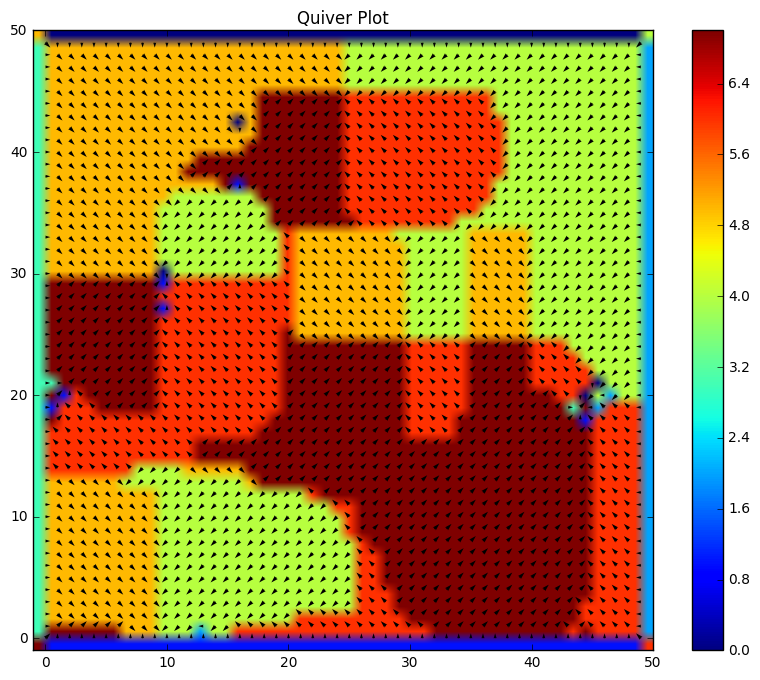

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(policy, origin='lower',extent=[-1,50,-1,50])
ax.quiver(V,U)
fig.colorbar(im)
ax.set(aspect=1, title='Quiver Plot')
plt.show()

In [5]:
sfmx = npy.zeros((8,50,50))
for i in range(50):
    for j in range(50):
        sfmx[:,i,j] = npy.exp(qvalue[:,i,j])/npy.sum(npy.exp(qvalue[:,i,j]))

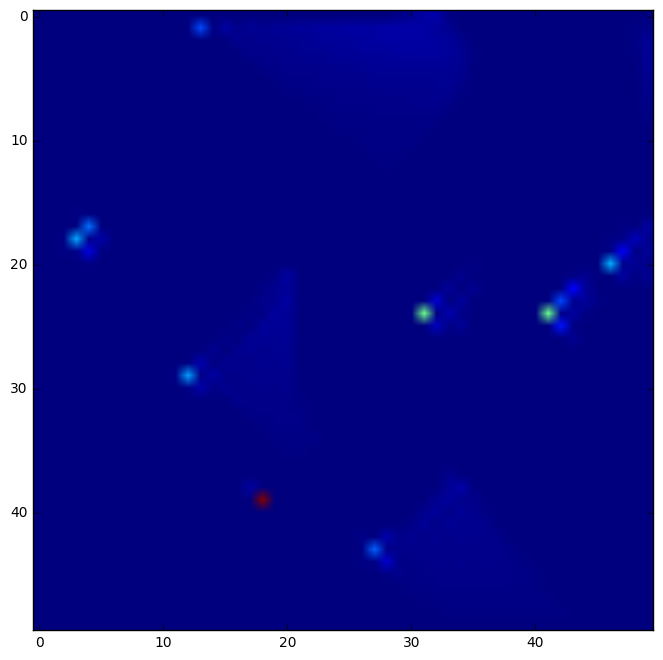

In [45]:
plt.imshow(sfmx[2])
plt.show()

In [46]:
ipx = npy.zeros((50,50))
ipy = npy.zeros((50,50))
for i in range(50):
    for j in range(50):
        ipx[i,j] = npy.dot(sfmx[:,i,j],action_space[:,0])
        ipy[i,j] = npy.dot(sfmx[:,i,j],action_space[:,1])

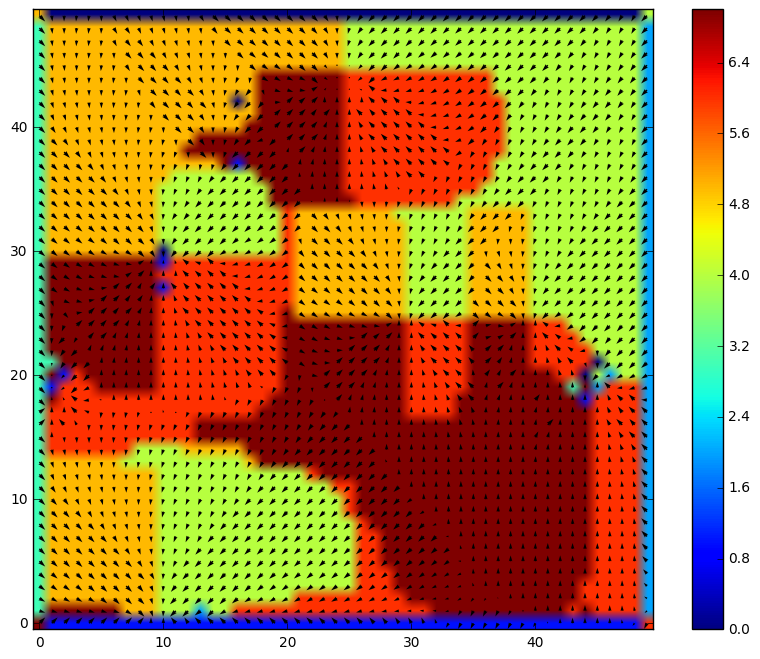

In [47]:
fig,ax = plt.subplots()
plt.imshow(policy,origin='lower')
ax.quiver(ipy,ipx)
plt.colorbar()
plt.show()

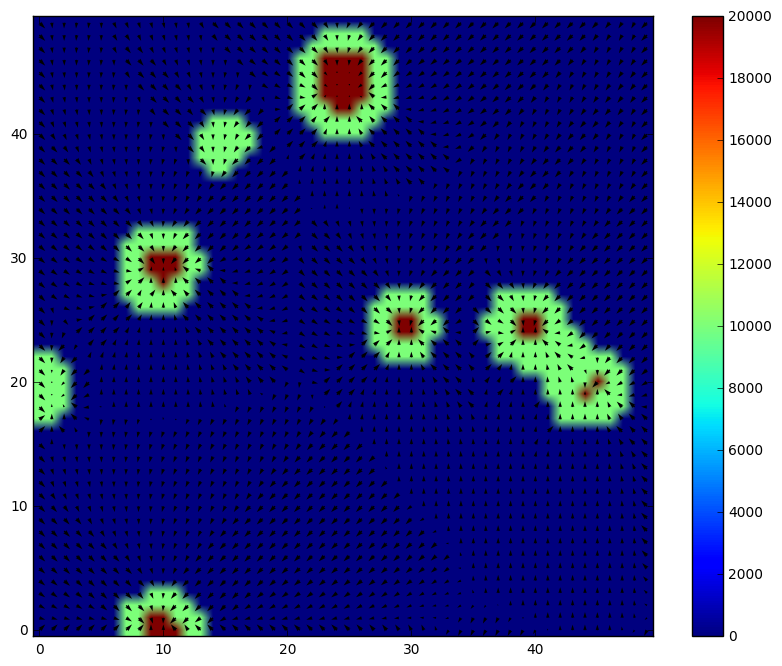

In [48]:
fig,ax = plt.subplots()
plt.imshow(reward,origin='lower')
ax.quiver(ipy,ipx)
plt.colorbar()
plt.show()

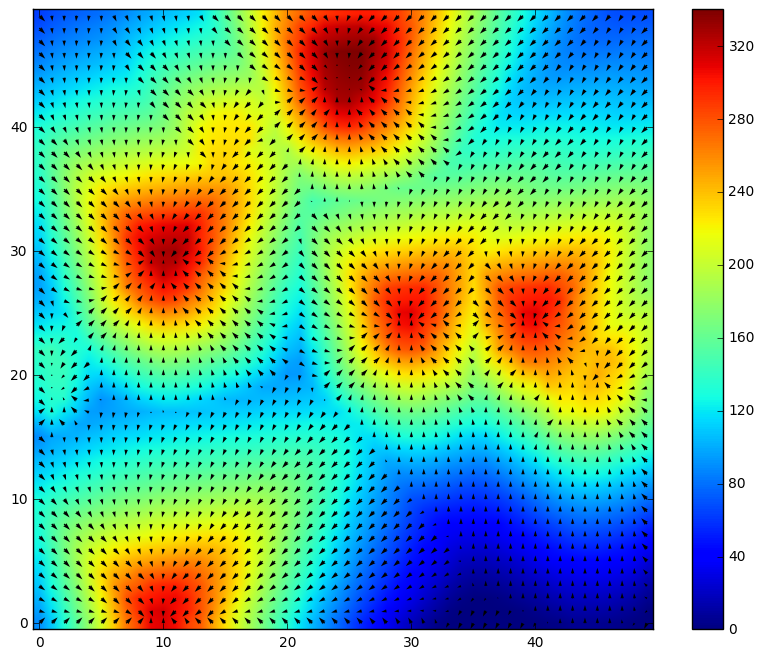

In [50]:
fig,ax = plt.subplots()
plt.imshow(value,origin='lower')
ax.quiver(ipy,ipx)
plt.colorbar()
plt.show()

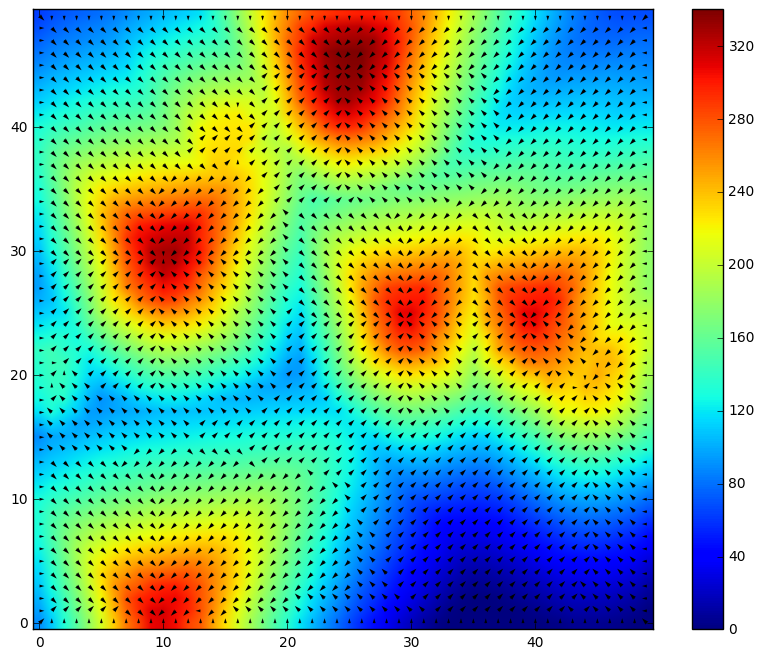

In [52]:
fig,ax = plt.subplots()
plt.imshow(value,origin='lower')
ax.quiver(V,U)
plt.colorbar()
plt.show()

In [3]:
cd ../..

/home/tanmay/Research/Code/VectorFields


In [4]:
pol = npy.load("Planned_Policy.npy")
soft = npy.load("Continuous_Policy.npy")
r = npy.load("Learnt_Reward.npy")
ql = npy.load("Learnt_QValue.npy")
qp = npy.load("Planned_QValue.npy")
vl = npy.load("Learnt_Value.npy")
vp = npy.load("Planned_Value.npy")



In [5]:
soft2 = npy.load("Continuous_Policy.npy")
pol2 = npy.load("Planned_Policy.npy")

In [16]:
vp.shape, soft2.shape

((51, 51, 11), (51, 51, 11, 3))

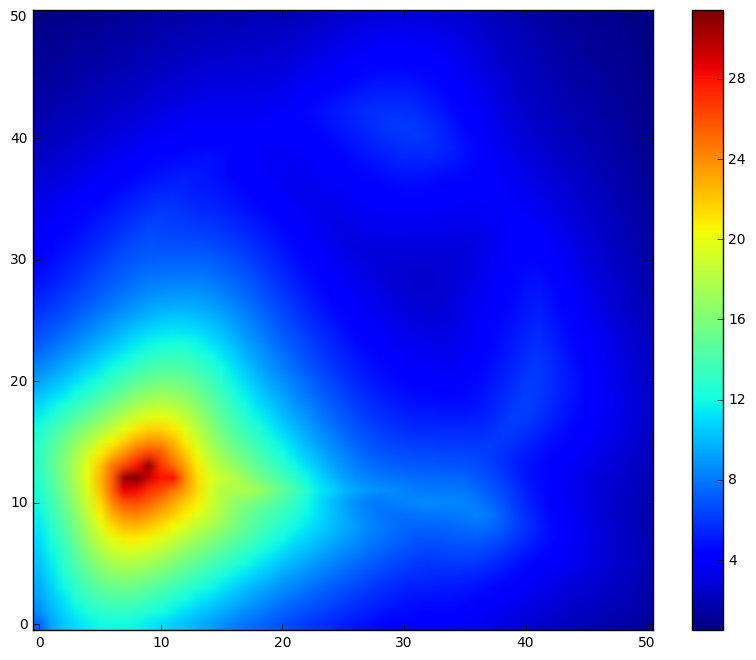

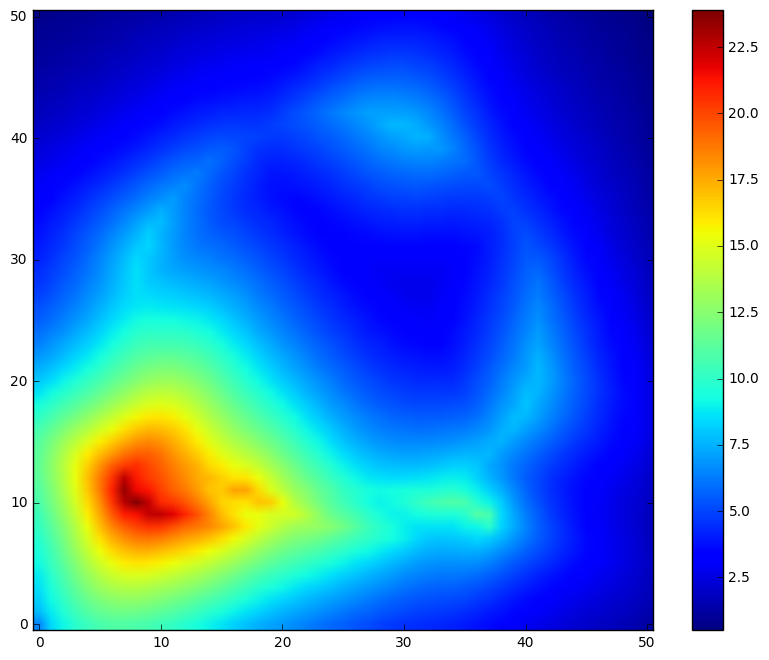

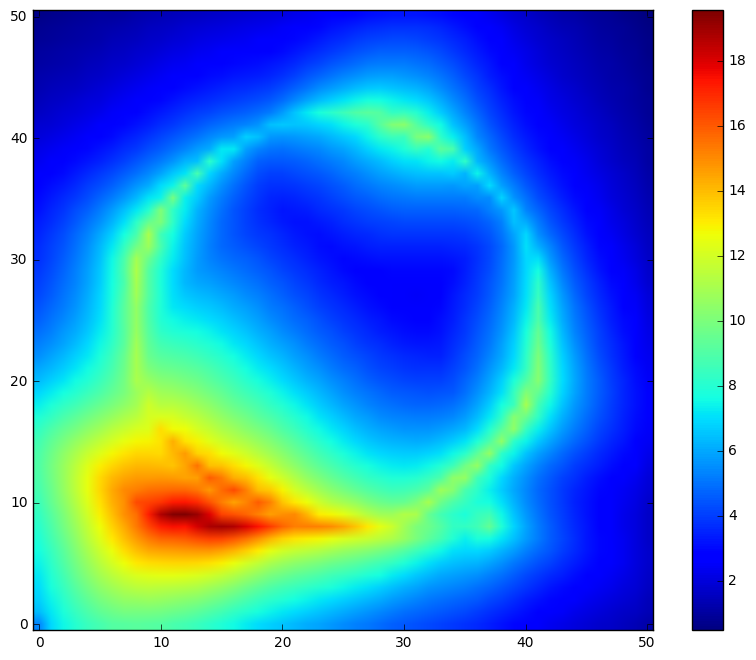

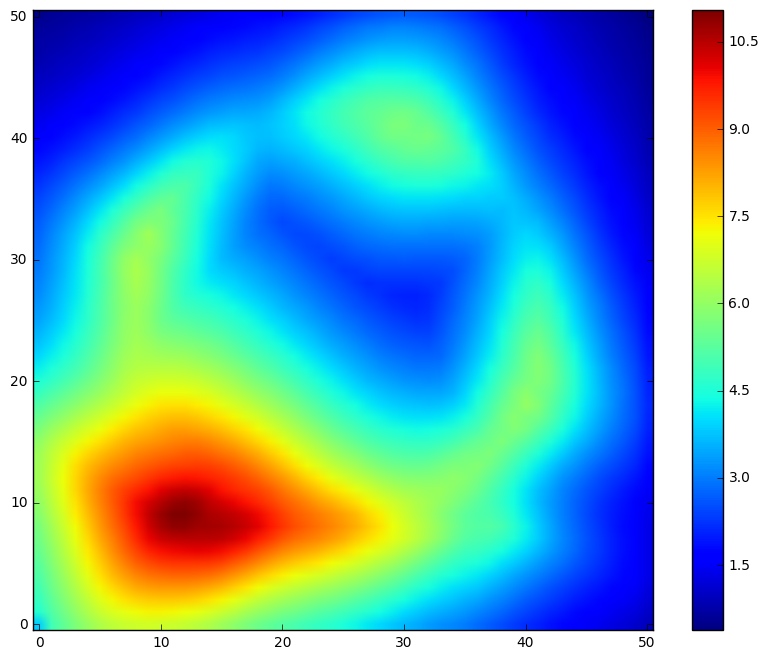

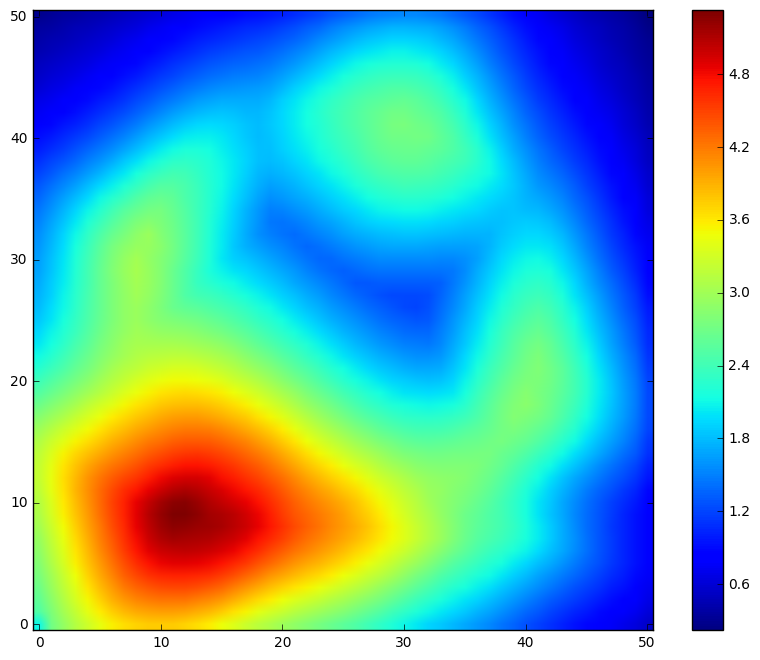

In [9]:
for i in range(6,11):
    plt.imshow(vp[:,:,i],origin='lower')
    plt.colorbar()
    plt.show()

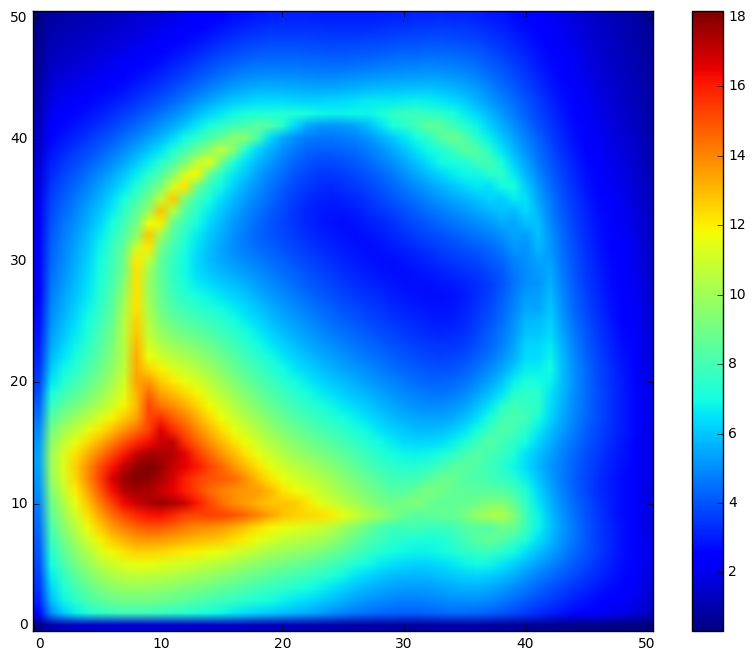

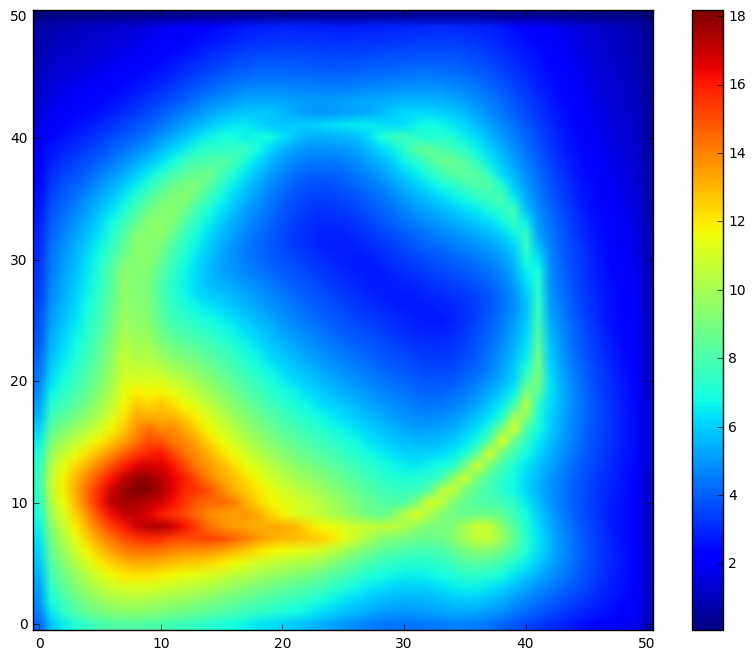

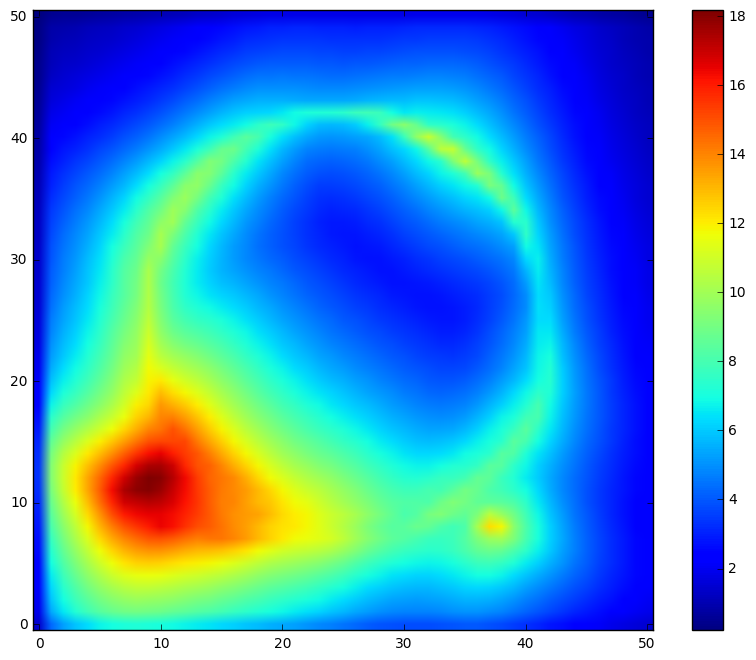

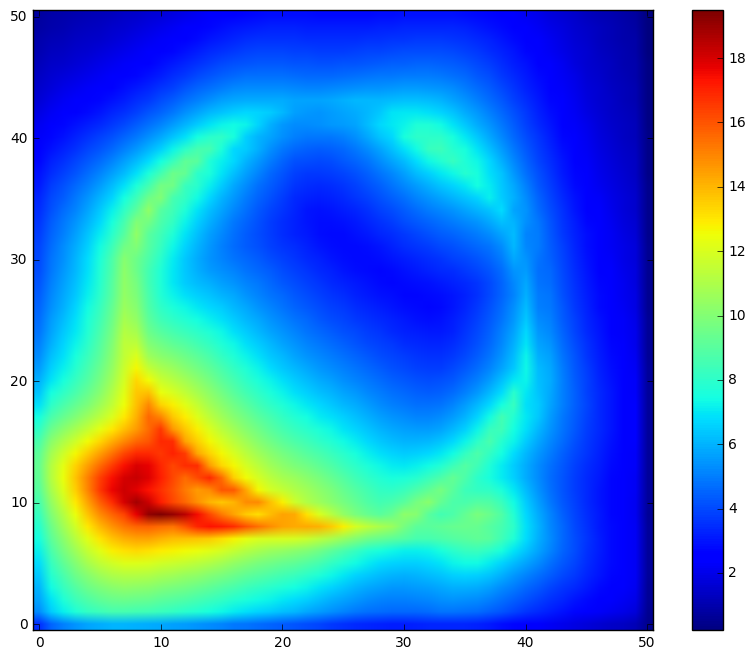

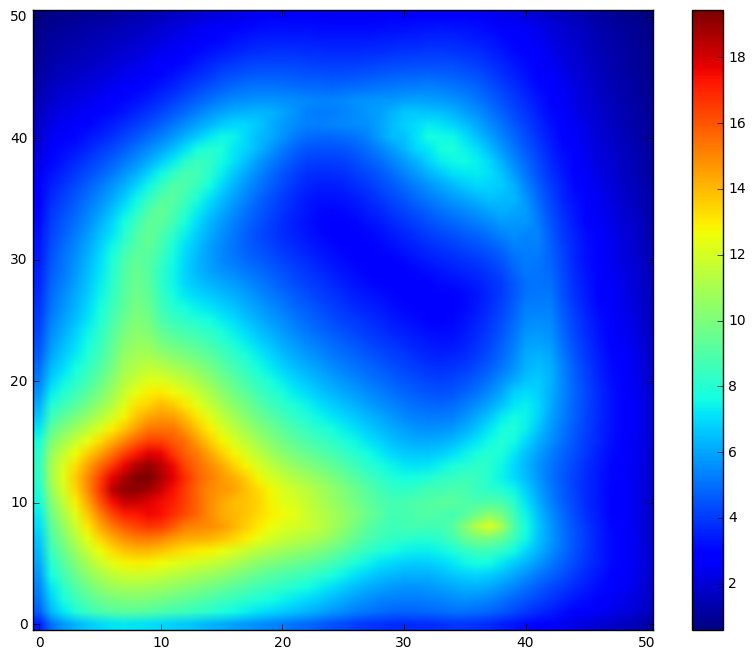

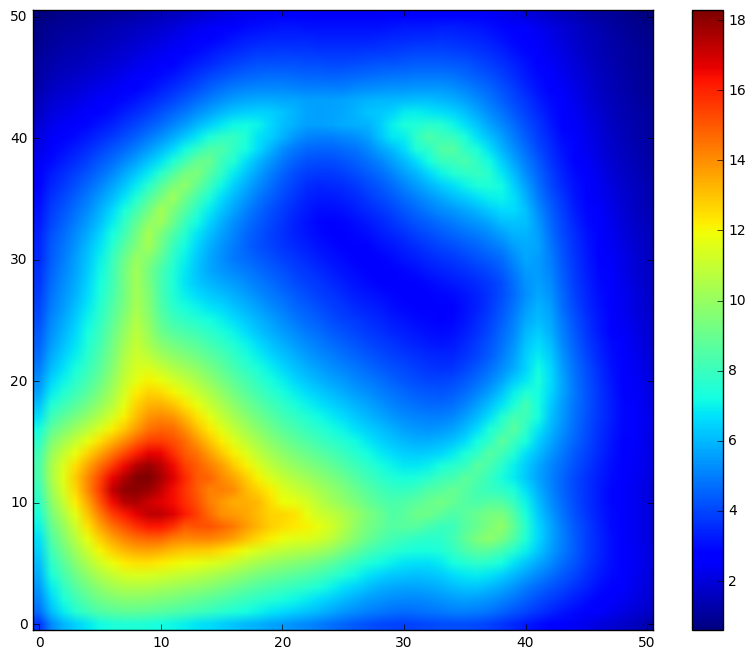

In [50]:
h = 8
for i in range(6):
    plt.imshow(qp[i,:,:,h],origin='lower')
    plt.colorbar()
    plt.show()
    

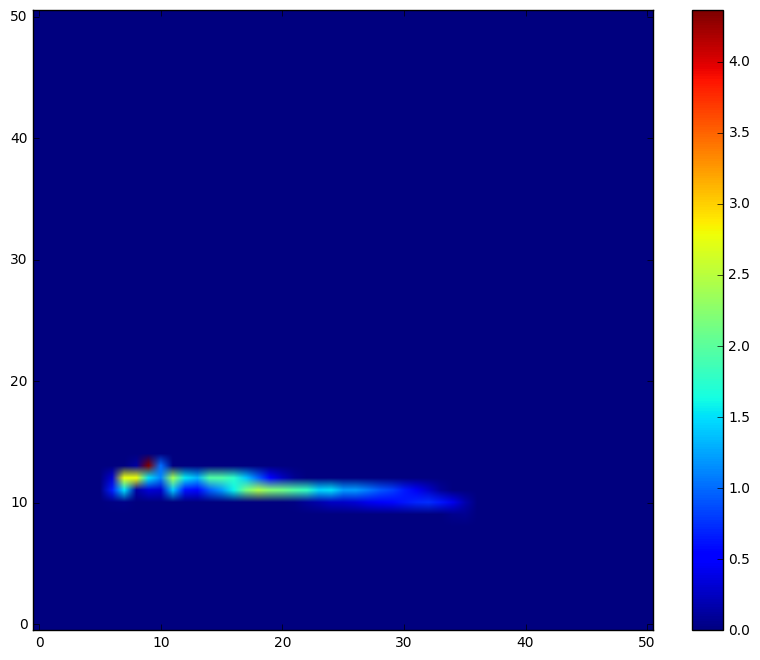

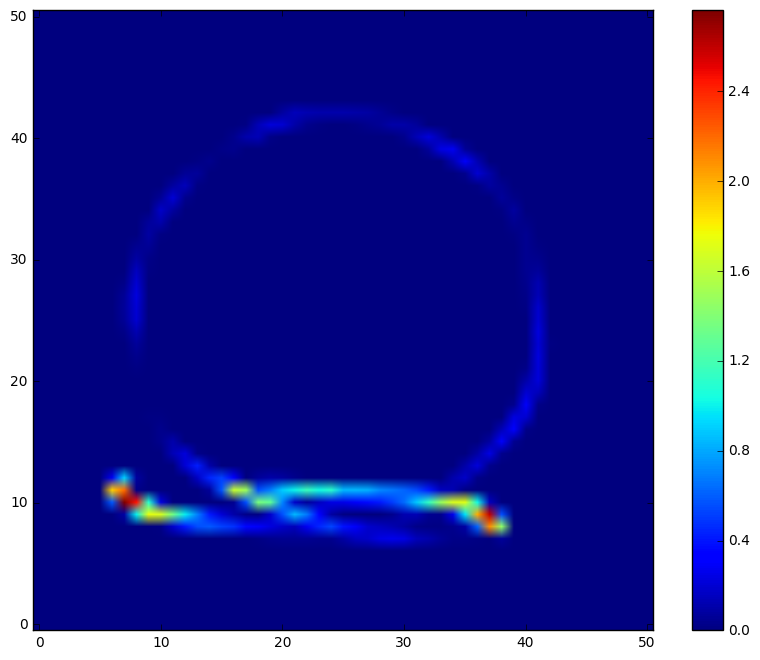

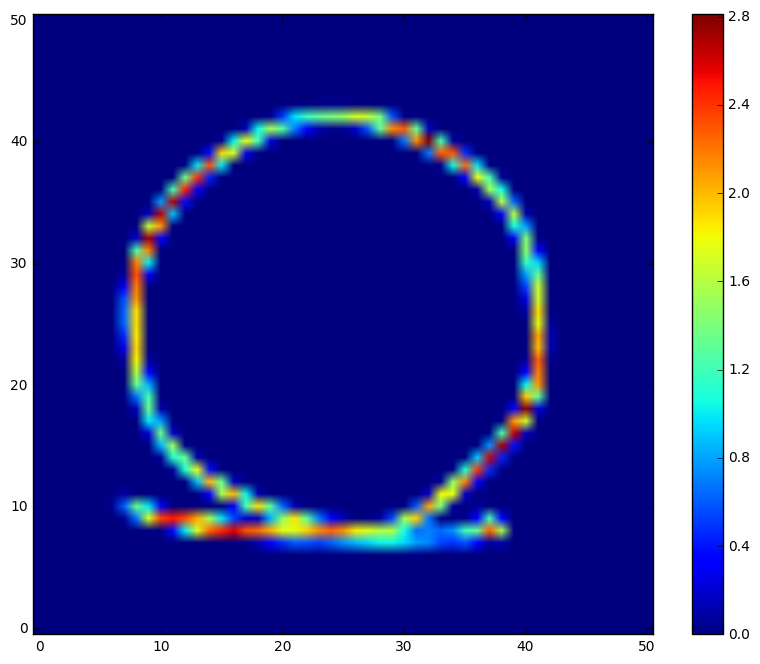

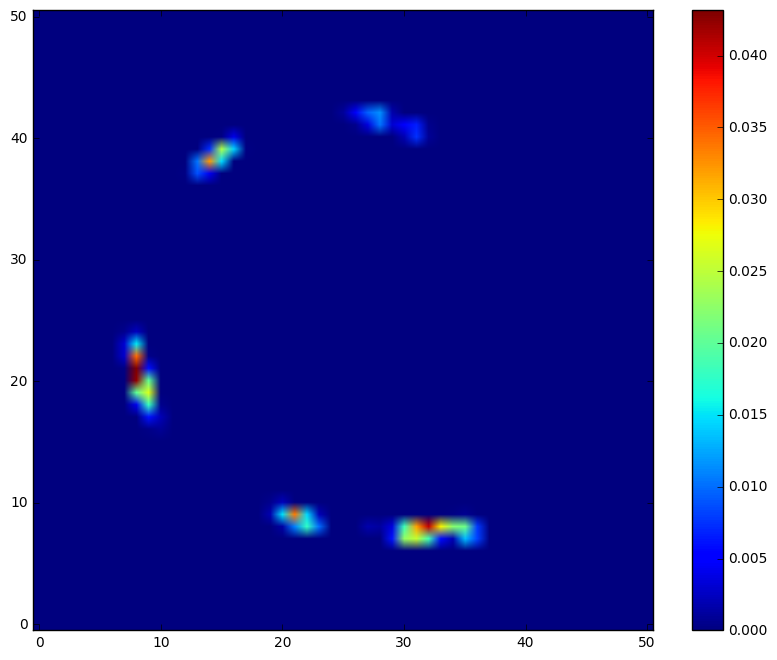

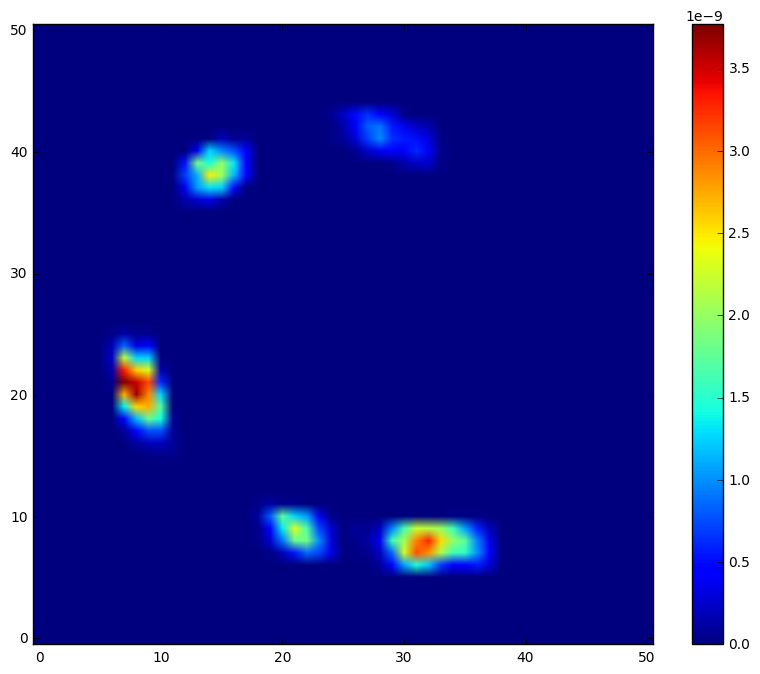

In [51]:
for i in range(6,11):
    plt.imshow(vl[:,:,i],origin='lower')
    plt.colorbar()
    plt.show()

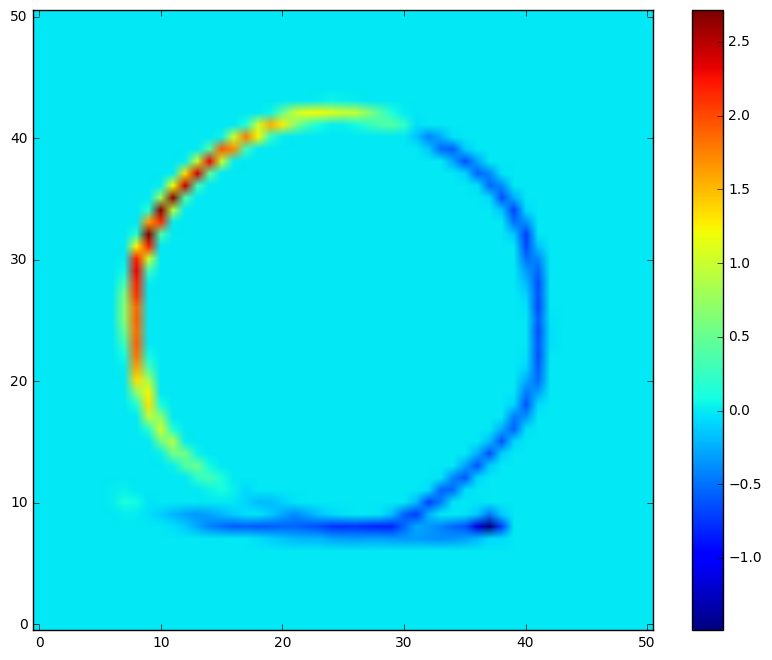

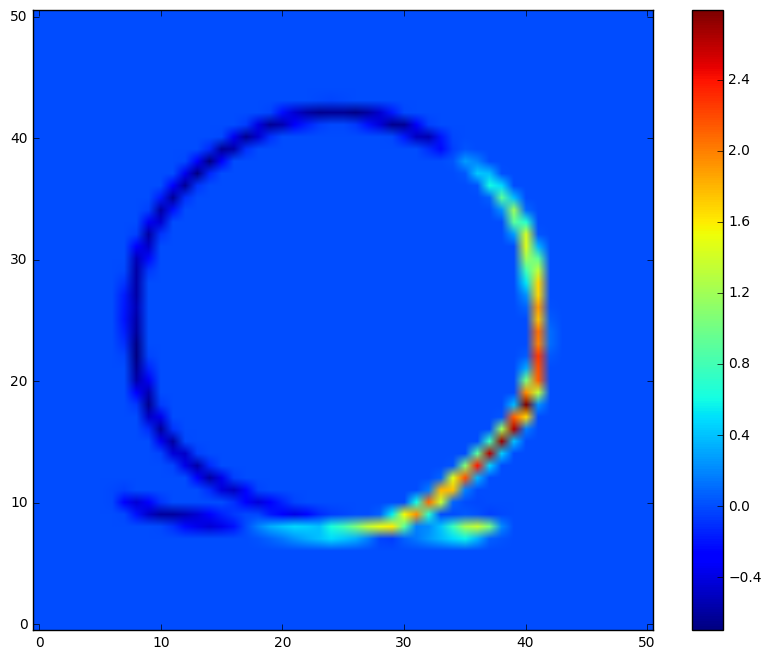

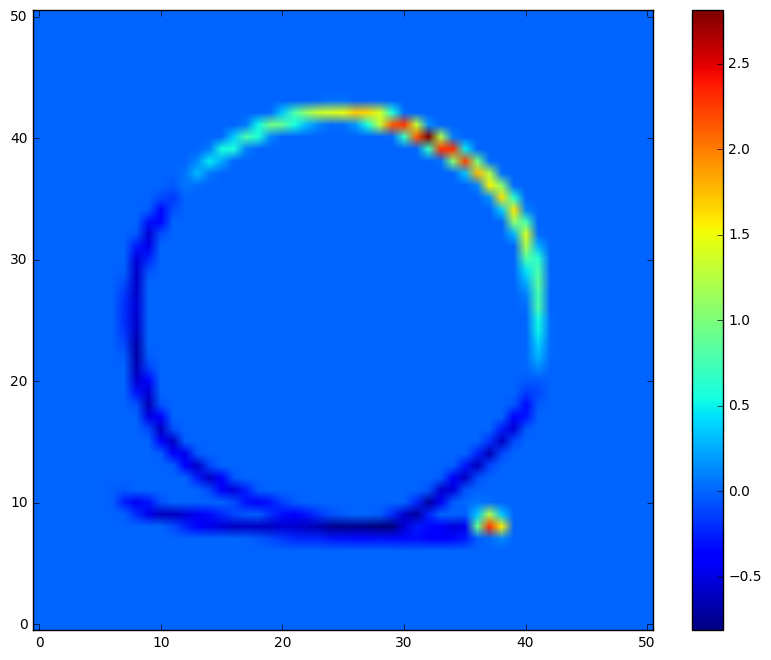

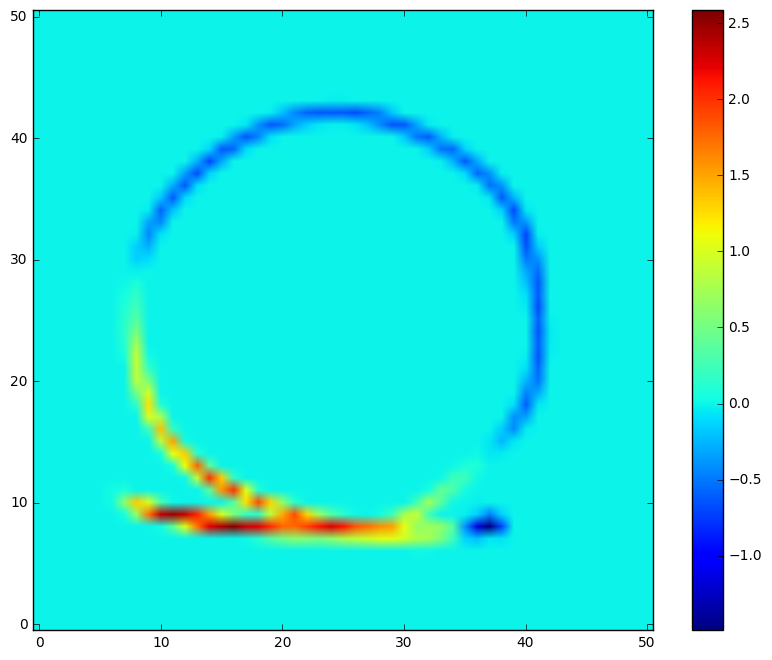

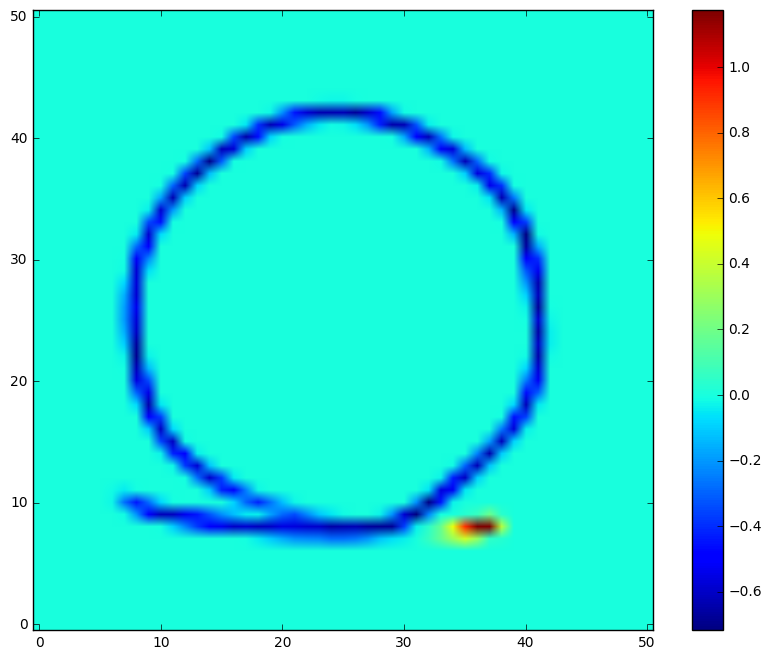

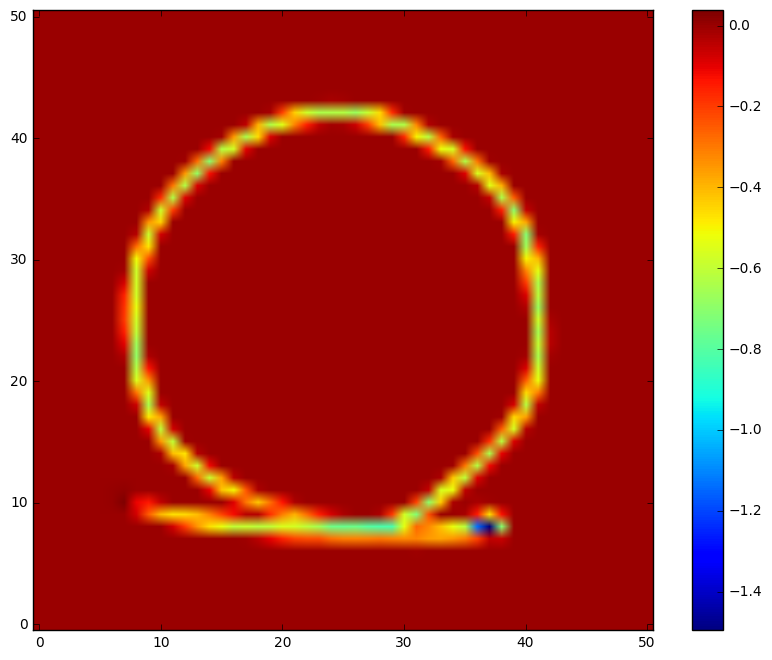

In [52]:
k = 8
for i in range(6):
    plt.imshow(r[i,:,:,k],origin='lower')
    plt.colorbar()
    plt.show()

In [6]:
u = npy.zeros((51,51,11))
v = npy.zeros((51,51,11))
w = npy.zeros((51,51,11))

act3d = npy.array([[-1,0,0],[1,0,0],[0,-1,0],[0,1,0],[0,0,-1],[0,0,1]])

for i in range(51):
    for j in range(51):
        for k in range(11):
            u[i,j,k] = act3d[pol[i,j,k]][0]
            v[i,j,k] = act3d[pol[i,j,k]][1]
            w[i,j,k] = act3d[pol[i,j,k]][2]
            


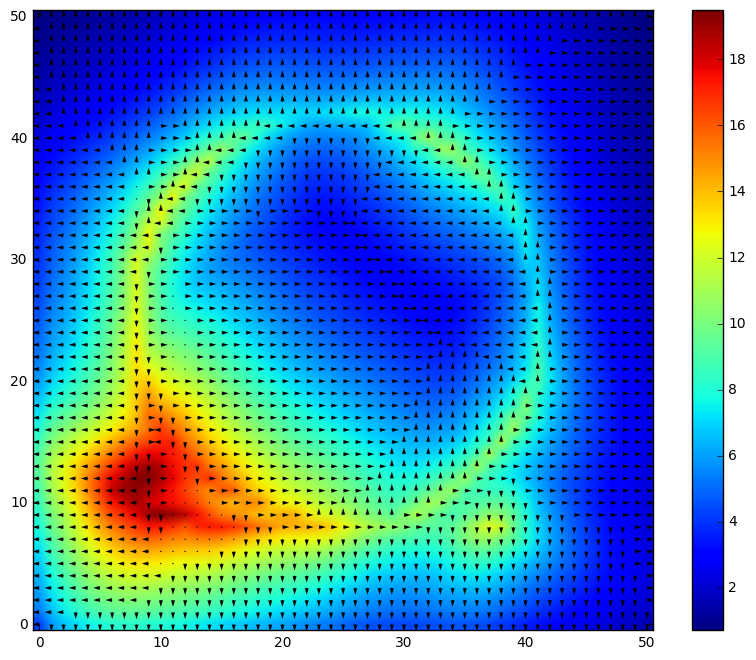

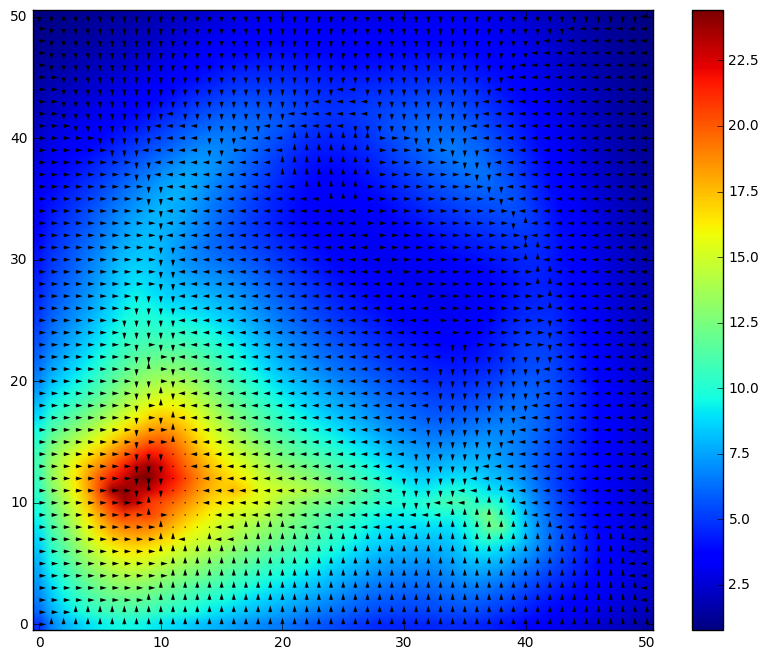

In [35]:
h = 8
fig, ax = plt.subplots()
sc = ax.imshow(vp[:,:,h],origin='lower')
x1, y1 = npy.mgrid[0:51,0:51]
# ax.quiver(u[:,:,h],v[:,:,h])
ax.quiver(x1,y1,-u[:,:,h],-v[:,:,h])
# ax.quiver(v[:,:,h],v[:,:,h])
plt.colorbar(sc)
plt.show()

h = 7
fig, ax = plt.subplots()
sc = ax.imshow(vp[:,:,h],origin='lower')

x1, y1 = npy.mgrid[0:51,0:51]
ax.quiver(x1,y1,u[:,:,h],v[:,:,h])
plt.colorbar(sc)
plt.show()

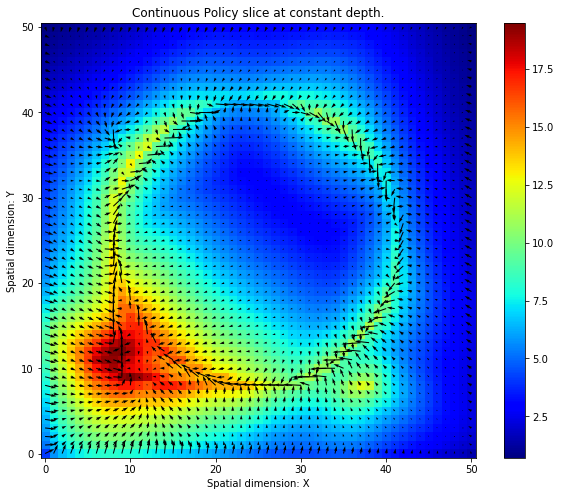

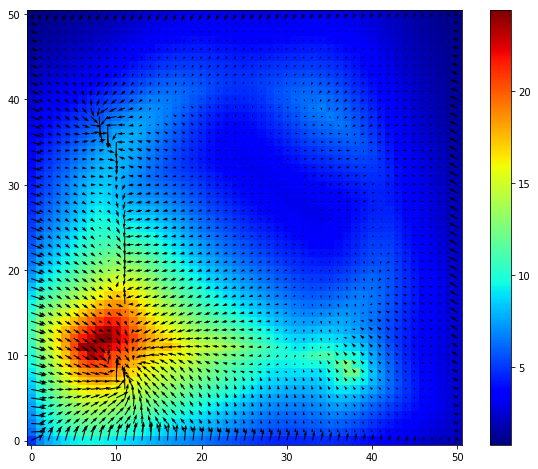

In [9]:
h = 8
fig, ax = plt.subplots()
sc = ax.imshow(vp[:,:,h],origin='lower',cmap='jet')
x1, y1 = npy.mgrid[0:51,0:51]
ax.quiver(x1,y1,soft[:,:,h,0],soft[:,:,h,1])
# ax.quiver(soft[:,:,h,1],soft[:,:,h,0])
ax.set_title("Continuous Policy slice at constant depth.")
ax.set_xlabel("Spatial dimension: X")
ax.set_ylabel("Spatial dimension: Y")
plt.colorbar(sc)
plt.show()

h = 7
fig, ax = plt.subplots()
sc =  ax.imshow(vp[:,:,h],origin='lower',cmap='jet')
x1, y1 = npy.mgrid[0:51,0:51]
ax.quiver(x1,y1,soft[:,:,h,0],soft[:,:,h,1])
plt.colorbar(sc)
plt.show()

In [8]:
adv = qp - vp

adv_pol = npy.zeros((51,51,11,3))

adv[npy.where(adv==0)]=1
sfmx_adv = npy.zeros((6,51,51,11))
sfmx_adv = npy.exp(adv)/npy.sum(npy.exp(adv),axis=0)
# sfmx_adv[npy.where(adv==0)]+=1

for i in range(51):
    for j in range(51):
        for k in range(11):
            for act in range(6):
                adv_pol[i,j,k] += act3d[act]*sfmx_adv[act,i,j,k]

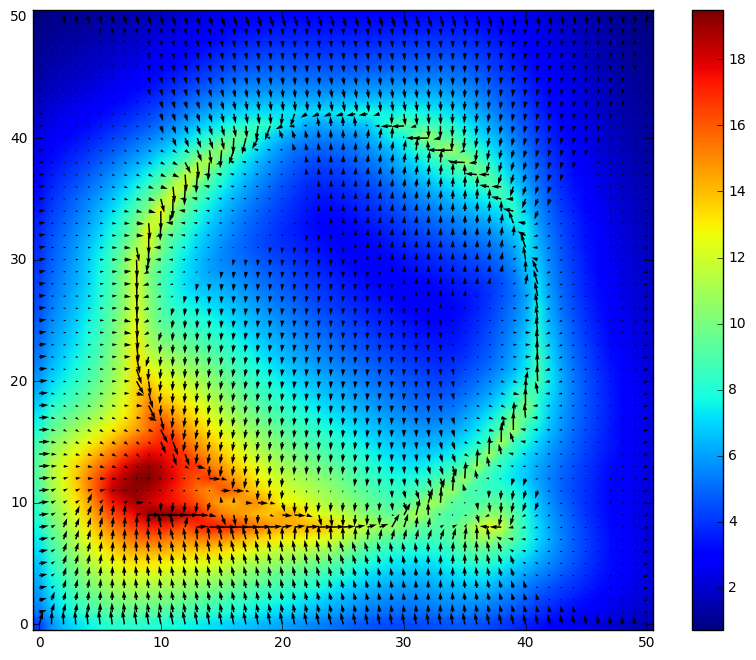

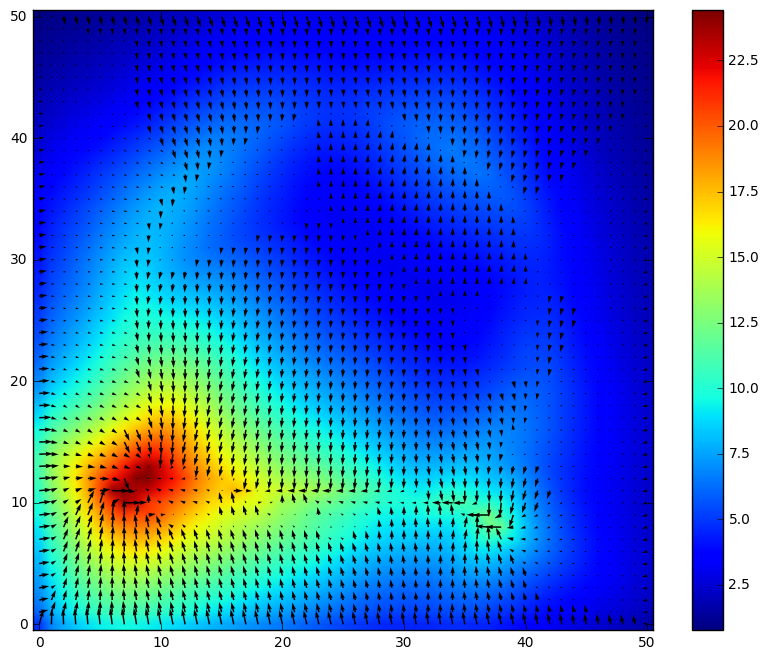

In [38]:
h = 8
fig, ax = plt.subplots()
sc = ax.imshow(vp[:,:,h],origin='lower')
ax.quiver(soft[:,:,h,1],adv_pol[:,:,h,0])
plt.colorbar(sc)
plt.show()

h = 7
fig, ax = plt.subplots()
sc =  ax.imshow(vp[:,:,h],origin='lower')
ax.quiver(soft[:,:,h,1],adv_pol[:,:,h,0])
plt.colorbar(sc)
plt.show()

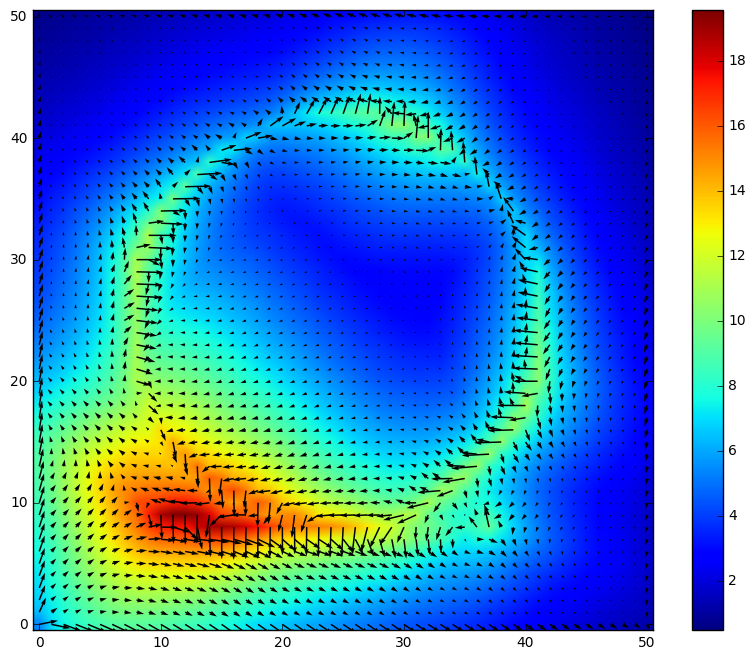

In [25]:
h = 8
fig, ax = plt.subplots()
sc = ax.imshow(vp[:,:,h],origin='lower')
ax.quiver(-soft[:,:,h,0],-soft[:,:,h,1])
plt.colorbar(sc)
plt.show()

In [8]:
def _powerset(iterable):
	# "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
	from itertools import combinations, chain
	s = list(iterable)
	return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

	# VARIABLE GRID SIZE ALONG DIFFERENT DIMENSIONS:
def interpolate_coefficients(point, traj_or_action=1):

    # Choose whether we are interpolating a trajectory or an action data point.

	# Now lower is just uniformly -1. 
	lower = -npy.ones(2)
	# If traj_or_action is 0, it's an action, if 1, it's a trajectory.
	# If trajectory, z lower must be 0.
# 	lower[2] += traj_or_action

	# grid_cell_size = traj_or_action * self.traj_cell + (1-traj_or_action)*self.action_cell
	gcs = npy.array([0.04,0.04])
	grid_cell_size = gcs

	base_indices = npy.floor((point-lower)/grid_cell_size)
	base_point = grid_cell_size*npy.floor(point/grid_cell_size)		
	base_lengths = point - base_point
	bases = []

	for index_set in _powerset(range(2)):
		index_set = set(index_set)
		volume = 1 
		# point_to_add = base_point.copy()
		index_to_add = base_indices.copy()
# 		for i in range(self.dimensions):
		for i in range(2):
			if i in index_set:
				side_length = base_lengths[i]			
				# point_to_add += self.grid_cell_size[i]
				index_to_add[i] += 1
			else:
				side_length = grid_cell_size[i] - base_lengths[i]
			volume *= side_length / grid_cell_size[i]
			# bases.append((volume, point_to_add, index_to_add))			
		bases.append((volume, index_to_add))			
	return bases


In [9]:
T = 100
x = npy.zeros((T,2))
s = 2*npy.random.random(2)-1
x[0] = s.copy()
s

array([-0.73295708,  0.35001257])

In [11]:
dt = 0.1
for t in range(1,T):
    split = interpolate_coefficients(x[t-1])
    x[t] = x[t-1].copy()
    for i in range(4):
        x[t] += dt*split[i][0]*npy.array([soft[int(split[i][1][0]),int(split[i][1][1]),h,0],soft[int(split[i][1][0]),int(split[i][1][1]),h,1]])
        

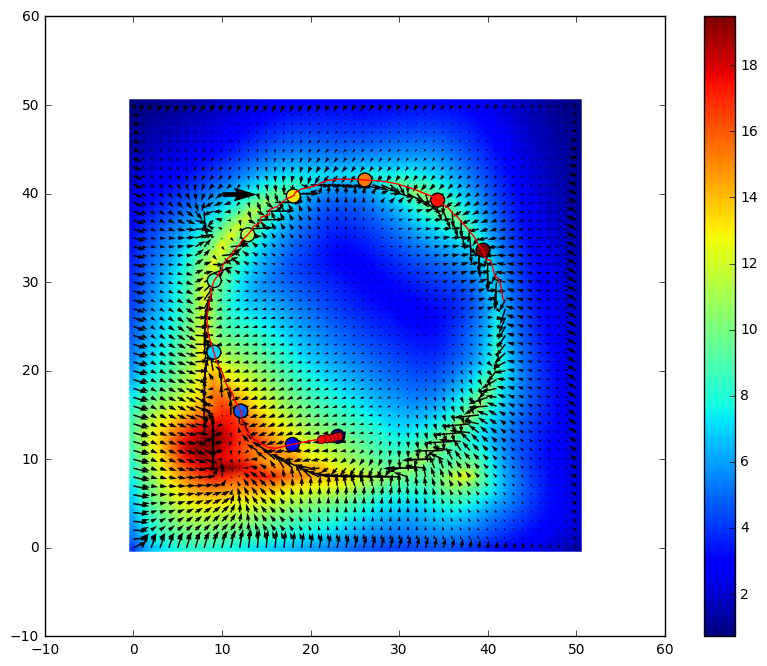

In [52]:
y = x.copy()
y += 1
y /= 2
y *= 51
tx = 10
h = 8
fig, ax = plt.subplots()
sc = ax.imshow(vp[:,:,h],origin='lower')


x1,y1 = npy.mgrid[0:51,0:51]
ax.quiver(x1,y1,soft[:,:,h,0],soft[:,:,h,1])
# ax.quiver(x1,y1,soft2[:,:,h,0],soft2[:,:,h,1])
# ax.quiver(x1,y1,u[:,:,h],v[:,:,h])
# ax.quiver(u[:,:,h],v[:,:,h])
# ax.quiver(v[:,:,h],u[:,:,h])

ax.quiver(10,40,1,0)

ax.plot(y[:,0],y[:,1],'r')
ax.plot(y[:5,0],y[:5,1],'or')
sc1 = ax.scatter(y[0:T:tx,0],y[0:T:tx,1],c=range(T/tx),s=100)

plt.colorbar(sc)
plt.show()

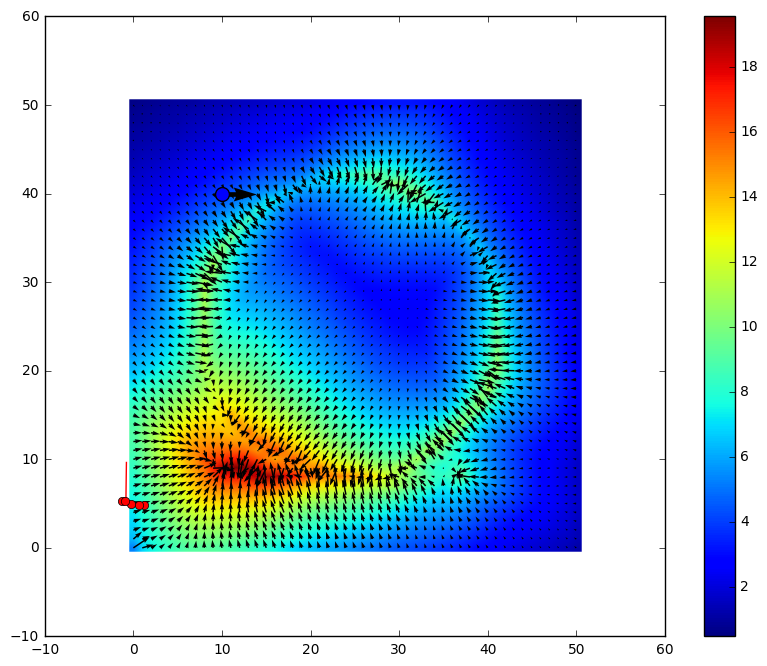

In [28]:
vgx, vgy = npy.gradient(vp[:,:,h])

fig, ax = plt.subplots()
sc = ax.imshow(vp[:,:,h],origin='lower')
ax.quiver(vgy,vgx)

ax.quiver(10,40,1,0)

ax.scatter(10,40,s=100)
ax.plot(y[:,0],y[:,1],'r')
ax.plot(y[:5,0],y[:5,1],'or')
plt.colorbar(sc)
plt.show()


In [10]:
def _powerset(iterable):
	# "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
	from itertools import combinations, chain
	s = list(iterable)
	return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

	# VARIABLE GRID SIZE ALONG DIFFERENT DIMENSIONS:
def interpolate_coefficients(point, traj_or_action=1):

    # Choose whether we are interpolating a trajectory or an action data point.

	# Now lower is just uniformly -1. 
	lower = -npy.ones(3)
	lower[2] = 0.
	# If traj_or_action is 0, it's an action, if 1, it's a trajectory.
	# If trajectory, z lower must be 0.
# 	lower[2] += traj_or_action

	# grid_cell_size = traj_or_action * self.traj_cell + (1-traj_or_action)*self.action_cell
	gcs = npy.array([0.04,0.04,0.1])
	grid_cell_size = gcs

	base_indices = npy.floor((point-lower)/grid_cell_size)
	base_point = grid_cell_size*npy.floor(point/grid_cell_size)		
	base_lengths = point - base_point
	bases = []

	for index_set in _powerset(range(3)):
		index_set = set(index_set)
		volume = 1 
		# point_to_add = base_point.copy()
		index_to_add = base_indices.copy()
# 		for i in range(self.dimensions):
		for i in range(3):
			if i in index_set:
				side_length = base_lengths[i]			
				# point_to_add += self.grid_cell_size[i]
				index_to_add[i] += 1
			else:
				side_length = grid_cell_size[i] - base_lengths[i]
			volume *= side_length / grid_cell_size[i]
			# bases.append((volume, point_to_add, index_to_add))			
		bases.append((volume, index_to_add))			
	return bases


In [17]:
# Now following a trajectory in 3D: 
T = 1000
# State:
x = npy.zeros((T,3))
# Random initialization.
x[0,:2] = 2*npy.random.random(2)-1
x[0,2] = 0.95

dt = 0.1
for t in range(1,T):
    split = interpolate_coefficients(x[t-1])
    x[t] = x[t-1].copy()
    
   
# Remember, for 3D this is 8 points.
    for i in range(8):
        if t==1:
            print(split[i])
        velocity = [soft[int(split[i][1][0]),int(split[i][1][1]),int(split[i][1][2]),0],
                    soft[int(split[i][1][0]),int(split[i][1][1]),int(split[i][1][2]),1],
                    soft[int(split[i][1][0]),int(split[i][1][1]),int(split[i][1][2]),2]]
        x[t] += dt*split[i][0]*npy.array(velocity)
        

(0.24726288305931607, array([  4.,  11.,   9.]))
(0.030945024584110695, array([  5.,  11.,   9.]))
(0.19712219059615321, array([  4.,  12.,   9.]))
(0.2472628830593154, array([  4.,  11.,  10.]))
(0.024669901760420679, array([  5.,  12.,   9.]))
(0.030945024584110612, array([  5.,  11.,  10.]))
(0.19712219059615271, array([  4.,  12.,  10.]))
(0.024669901760420616, array([  5.,  12.,  10.]))


In [34]:
pwd

u'/home/tanmay/Research/Code/VectorFields'

In [32]:
npy.save("Another_nice_trajectory.npy",x)

<IPython.core.display.Javascript object>


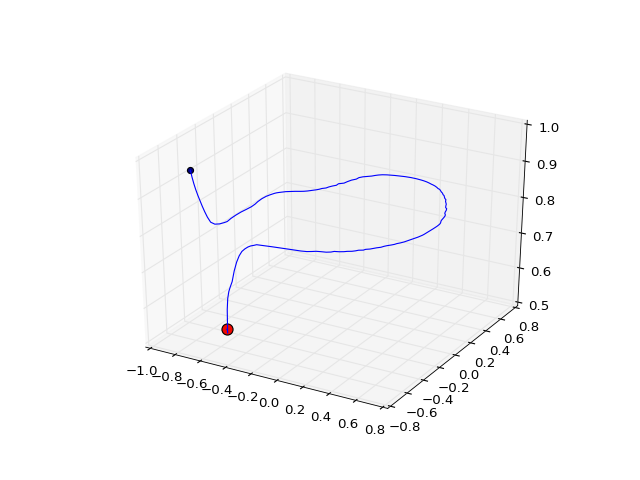

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x[:,0],x[:,1],x[:,2])
ax.scatter(x[0,0],x[0,1],x[0,2],s=30,c=0,vmin=0,vmax=1)
ax.scatter(x[-1,0],x[-1,1],x[-1,2],s=100,c=0.9,vmin=0,vmax=1)
plt.show()



<IPython.core.display.Javascript object>


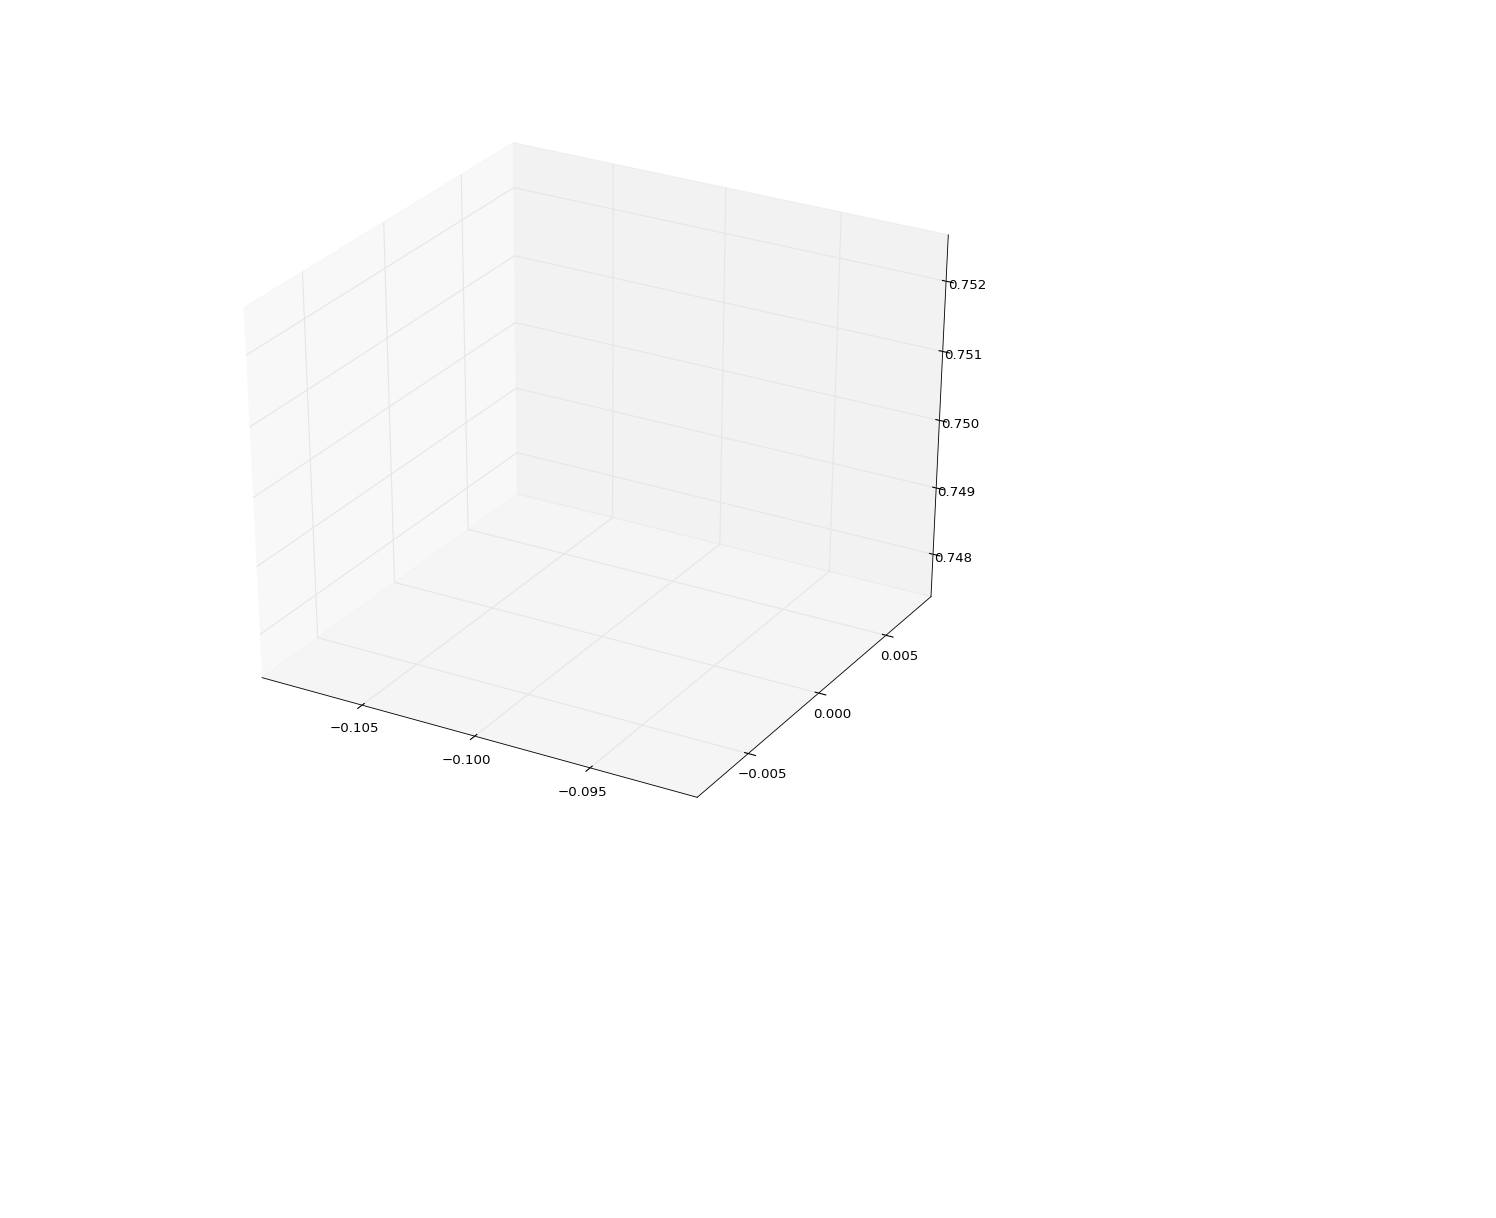

In [36]:
vels = npy.diff(x,axis=0)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x[:,0],x[:,1],x[:,2],'r')
ax.quiver(x[:-1,0],x[:-1,1],x[:-1,2],vels[:,0],vels[:,1],vels[:,2],pivot='tail',length=0.1)
ax.scatter(x[0,0],x[0,1],x[0,2],s=50,c=0,vmin=0,vmax=1)
ax.scatter(x[-1,0],x[-1,1],x[-1,2],s=50,c=0.9,vmin=0,vmax=1)
plt.show()


In [35]:
%matplotlib notebook

In [22]:
x1 = x.copy()
x1 += 1
x1 *= npy.array([51,51,11])/2
vels1 = npy.diff(x1,axis=0)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X,Y,Z = npy.mgrid[0:51,0:51,0:11]
ax.quiver(X,Y,Z,soft[:,:,:,0],soft[:,:,:,1],soft[:,:,:,2],length=0.1)

ax.plot(x1[:,0],x1[:,1],x1[:,2],'r')
ax.scatter(x1[0,0],x1[0,1],x1[0,2])
ax.quiver(x1[:-1,0],x1[:-1,1],x1[:-1,2],vels1[:,0],vels1[:,1],vels1[:,2],pivot='tail',length=0.3)
plt.show()
